# SUP $\rightarrow$ DEN Simulations

In [1]:
# Import packages.
import analysis_functions as af
import numpy as np
import pandas as pd
import scipy
from scipy import stats as stats
# Print version numbers.
print('numpy', np.__version__)
print('pandas', pd.__version__)
print('scipy', scipy.__version__)

numpy 1.22.3
pandas 1.4.2
scipy 1.8.0


In [2]:
# Intialize the pandas preferences.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Intialize a dictionary.
hubisz_dicc = {}
# Define the file path.
path = '../sup_intro_sims/simulated_results/'
# Intialize effective population sizes.
nes = [(2500, 3400), (3400, 2500)]
# Load the simulated results.
for t_intro in [2.5, 3.0]:
    hubisz_dicc[t_intro] = {}
    for t_div in [1.0, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0]:
        hubisz_dicc[t_intro][t_div] = {}
        for ne in nes:
            nea_ne, den_ne = ne
            hubisz_dicc[t_intro][t_div][ne] = np.loadtxt(
                path+f'sup2den_f1.0_tgf_{t_intro * 100_000}kya_tdiv_{t_div * 1_000_000}mya_neaNe_{nea_ne}_denNe_{den_ne}.csv.gz',
                delimiter=',',
            )

In [4]:
# Intialize a dictionary to store the distributions.
dist_dicc = {}
# Intialize effective population sizes and introgression times.
configs = [
    (2500, 3400, 2.5),
    (3400, 2500, 2.5),
    (2500, 3400, 3.0),
    (3400, 2500, 3.0),
]
# Consolidate the distributions.
for config in configs:
    nea_ne, den_ne, t_intro = config
    for t_div in [1.0, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0]:
        dist_dicc[(nea_ne, den_ne, t_intro, t_div)] = {}
        for metric in range(2):
            dist_dicc[(nea_ne, den_ne, t_intro, t_div)][metric] = {}
            # Mask out the np.nan's.
            dist = hubisz_dicc[t_intro][t_div][(nea_ne, den_ne)][:, metric]
            nan_mask = np.isnan(dist)
            m_dist = dist[~nan_mask]
            # Fill the dictionary with the mean and standard deviation.
            dist_dicc[(nea_ne, den_ne, t_intro, t_div)][metric]['mean'] = np.mean(m_dist)
            dist_dicc[(nea_ne, den_ne, t_intro, t_div)][metric]['std'] = np.std(m_dist)
# Intialize a metric and scenario dictionary.
metric_dicc = {
    0: {'obs': 66, 'label': '((AFR >= 95%, Altai Nean. = 1/1), Denisovan = 0/0)'},
    1: {'obs': 99, 'label': '((AFR <= 5%, Altai Nean. = 0/0), Denisovan = 1/1)'},
}
# Intialize a dictionary to store the results.
df_dicc = {
    'ne_n': [], 'ne_d': [], 
    'tgf': [], 'tdiv': [],
    'met': [], 'm': [],
    'std': [], 'tof': [],
}
# For all simulation paramters...
for params in dist_dicc.keys():
    # Unpack the parameters.
    nea_ne, den_ne, t_intro, t_div = params
    # For every metric...
    for metric in range(2):
        # Assess if the the observed values are within two standard deviations of
        # the simulated mean.
        cond_1 = metric_dicc[metric]['obs'] <= (dist_dicc[params][metric]['mean'] + (2 * dist_dicc[params][metric]['std']))
        cond_2 = metric_dicc[metric]['obs'] >= (dist_dicc[params][metric]['mean'] - (2 * dist_dicc[params][metric]['std']))
        within_dist = cond_1 & cond_2
        # Fill the dictionary.
        df_dicc['ne_n'].append(nea_ne)
        df_dicc['ne_d'].append(den_ne)
        df_dicc['tgf'].append(int(t_intro * 100))
        df_dicc['tdiv'].append(t_div)
        df_dicc['met'].append(metric_dicc[metric]['label'])
        df_dicc['m'].append(dist_dicc[params][metric]['mean'])
        df_dicc['std'].append(dist_dicc[params][metric]['std'])
        df_dicc['tof'].append(within_dist)
# Convert the dictionary to a dataframe.
sim_df = pd.DataFrame(data=df_dicc)
# Rename all the columns to look pretty.
sim_df.rename(
    columns={
        'ne_n': r'Altai Nean. $\left( N_{e} \right)$',
        'ne_d': r'Denisovan $\left( N_{e} \right)$',
        'tgf': r'$t_{gf}$ (kya)',
        'tdiv': r'$t_{div}$ (mya)',
        'met': 'Metric',
        'm': r'Simulated $\left( \mu \right)$',
        'std': r'Simulated $\left( \sigma \right)$',
        'tof': 'Plausible?',
    }, inplace=True,
)

In [5]:
# Show all the results.
sim_df

,Altai Nean. $\left( N_{e} \right)$,Denisovan $\left( N_{e} \right)$,$t_{gf}$ (kya),$t_{div}$ (mya),Metric,Simulated $\left( \mu \right)$,Simulated $\left( \sigma \right)$,Plausible?
0,2500,3400,250,1.00,"((AFR >= 95%, Altai Nean. = 1/1), Denisovan = ...",9.510,8.180581,False
1,2500,3400,250,1.00,"((AFR <= 5%, Altai Nean. = 0/0), Denisovan = 1/1)",48.098,12.425152,False
2,2500,3400,250,1.50,"((AFR >= 95%, Altai Nean. = 1/1), Denisovan = ...",20.769,11.904858,False
3,2500,3400,250,1.50,"((AFR <= 5%, Altai Nean. = 0/0), Denisovan = 1/1)",73.050,14.774014,True
4,2500,3400,250,1.75,"((AFR >= 95%, Altai Nean. = 1/1), Denisovan = ...",27.121,13.422532,False
5,2500,3400,250,1.75,"((AFR <= 5%, Altai Nean. = 0/0), Denisovan = 1/1)",83.276,14.804655,True
6,2500,3400,250,2.00,"((AFR >= 95%, Altai Nean. = 1/1), Denisovan = ...",34.821,14.741471,False
7,2500,3400,250,2.00,"((AFR <= 5%, Altai Nean. = 0/0), Denisovan = 1/1)",94.386,15.344869,True
8,2500,3400,250,2.25,"((AFR >= 95%, Altai Nean. = 1/1), Denisovan = ...",41.715,15.699356,True
9,2500,3400,250,2.25,"((AFR <= 5%, Altai Nean. = 0/0), Denisovan = 1/1)",104.461,16.032170,True


In [6]:
# Show the results that are plausible.
sim_df[sim_df[r'$t_{div}$ (mya)'] == 2.25]

,Altai Nean. $\left( N_{e} \right)$,Denisovan $\left( N_{e} \right)$,$t_{gf}$ (kya),$t_{div}$ (mya),Metric,Simulated $\left( \mu \right)$,Simulated $\left( \sigma \right)$,Plausible?
8,2500,3400,250,2.25,"((AFR >= 95%, Altai Nean. = 1/1), Denisovan = ...",41.715,15.699356,True
9,2500,3400,250,2.25,"((AFR <= 5%, Altai Nean. = 0/0), Denisovan = 1/1)",104.461,16.032170,True
24,3400,2500,250,2.25,"((AFR >= 95%, Altai Nean. = 1/1), Denisovan = ...",41.340,15.167676,True
25,3400,2500,250,2.25,"((AFR <= 5%, Altai Nean. = 0/0), Denisovan = 1/1)",104.678,15.210928,True
40,2500,3400,300,2.25,"((AFR >= 95%, Altai Nean. = 1/1), Denisovan = ...",42.721,15.961177,True
41,2500,3400,300,2.25,"((AFR <= 5%, Altai Nean. = 0/0), Denisovan = 1/1)",104.562,16.008503,True
56,3400,2500,300,2.25,"((AFR >= 95%, Altai Nean. = 1/1), Denisovan = ...",41.892,15.359308,True
57,3400,2500,300,2.25,"((AFR <= 5%, Altai Nean. = 0/0), Denisovan = 1/1)",104.995,16.072118,True


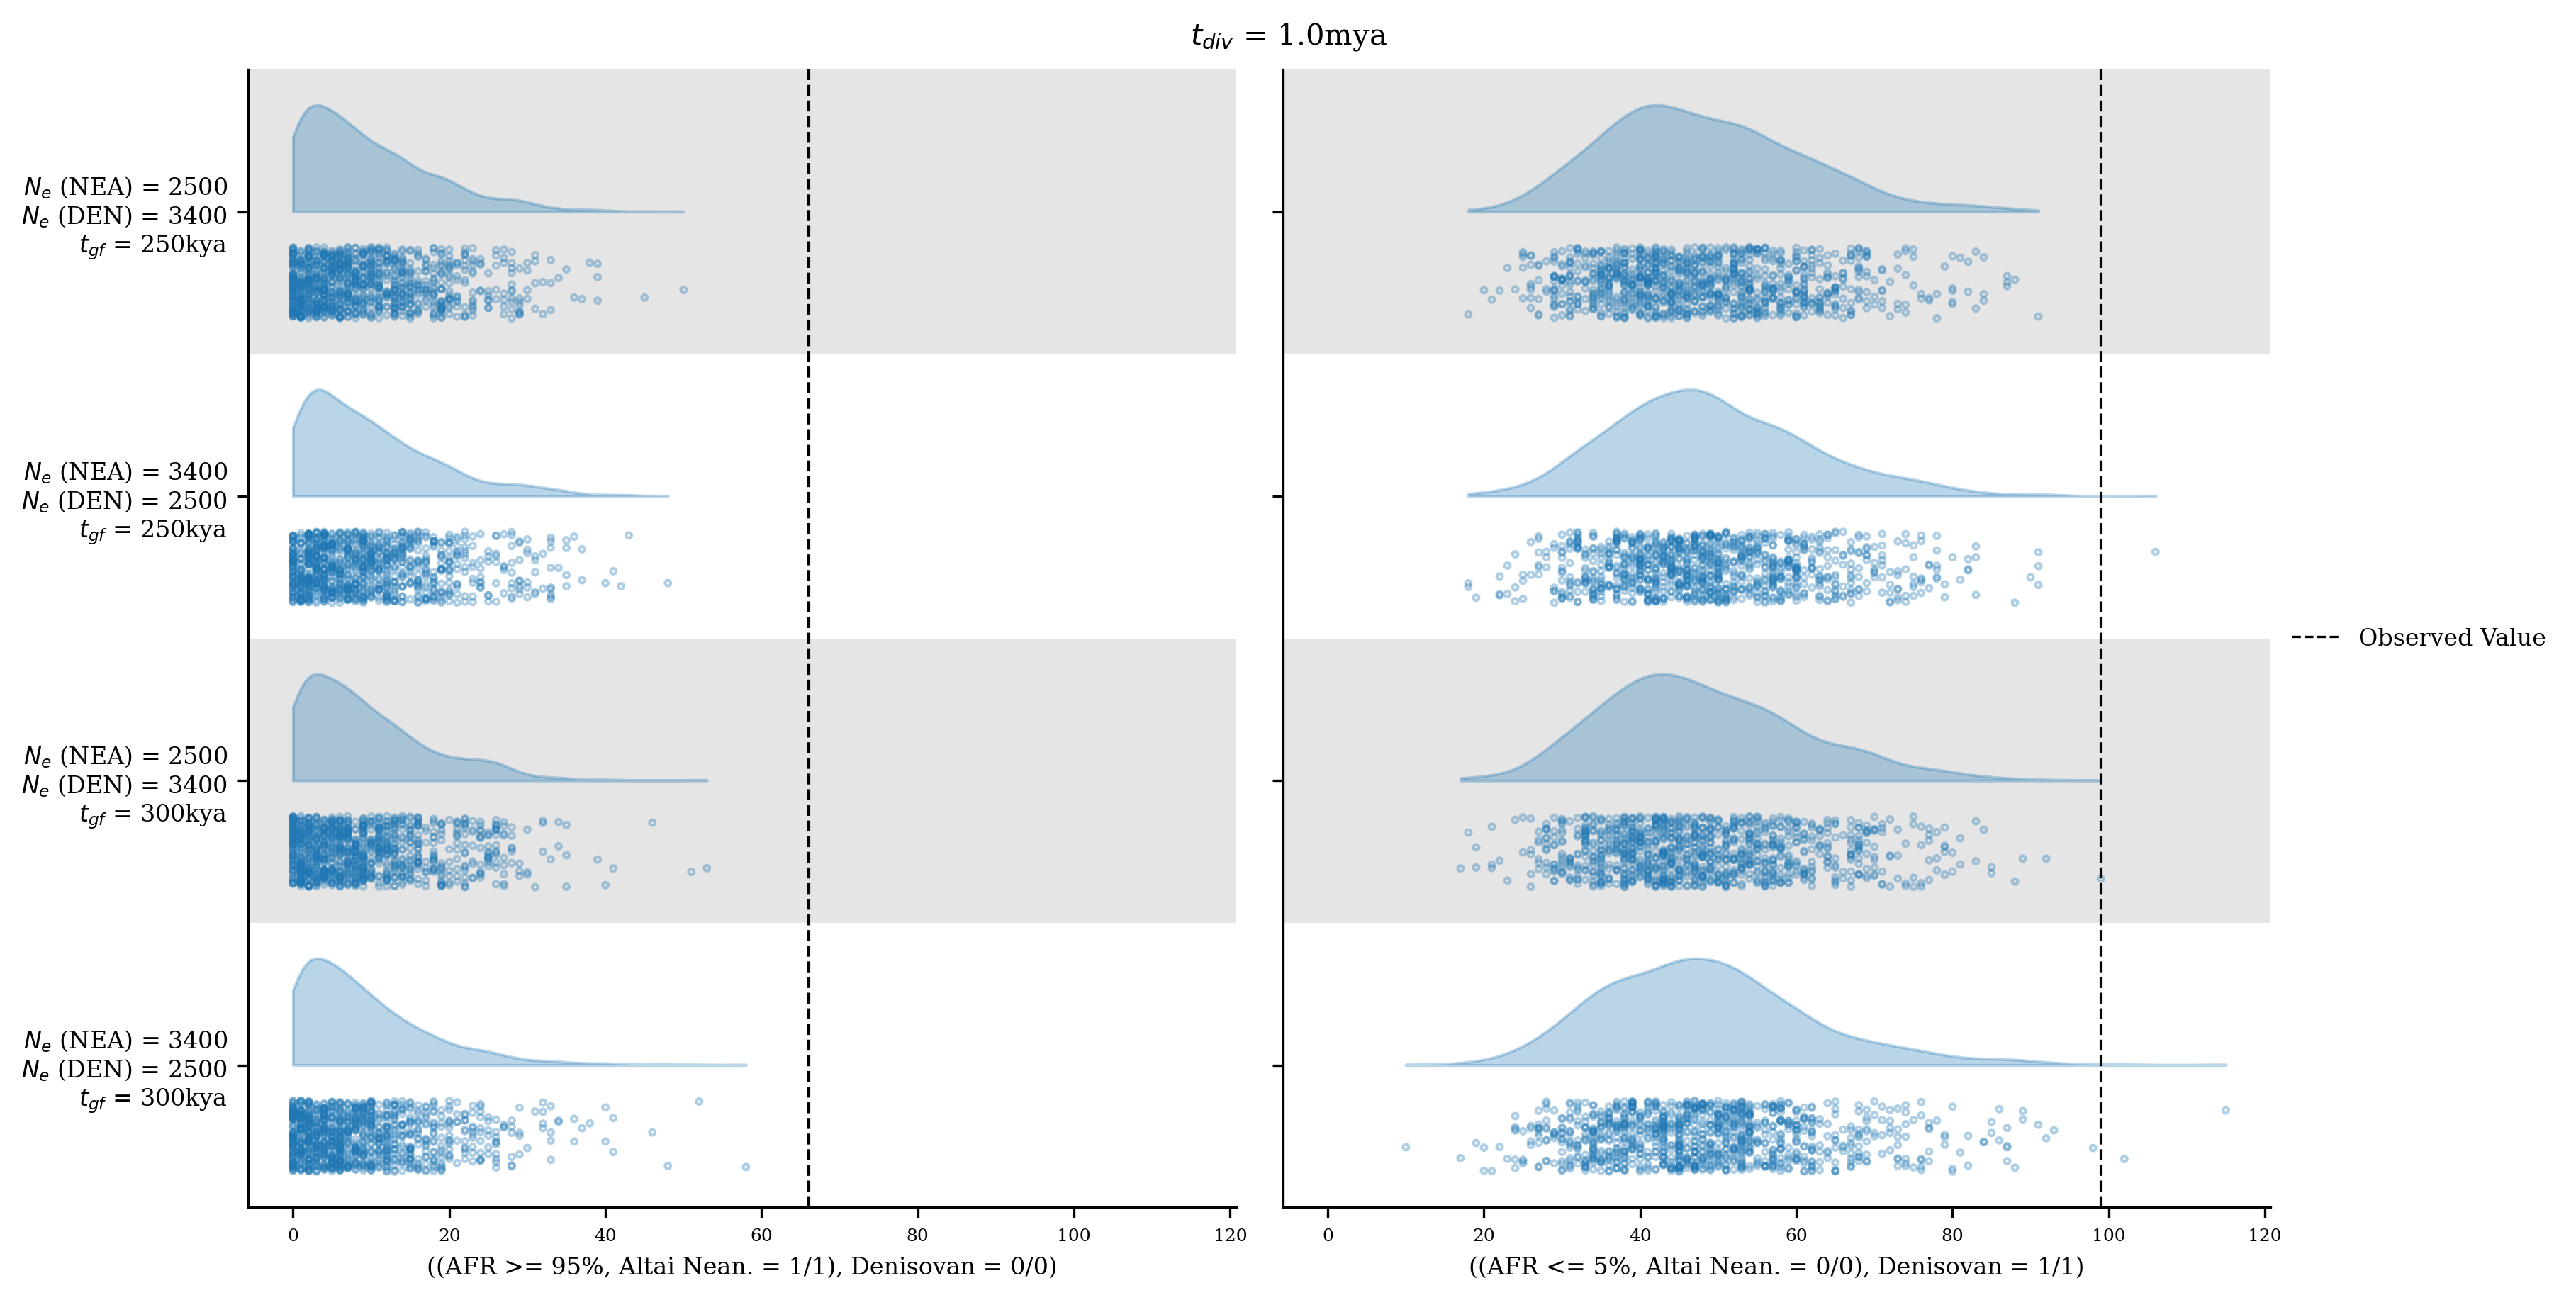

In [7]:
# Plot the results for the lower bound from Hubisz et al.
af.plot_sup2den_v_afr2nea_1d(hubisz_dicc, 1.0)

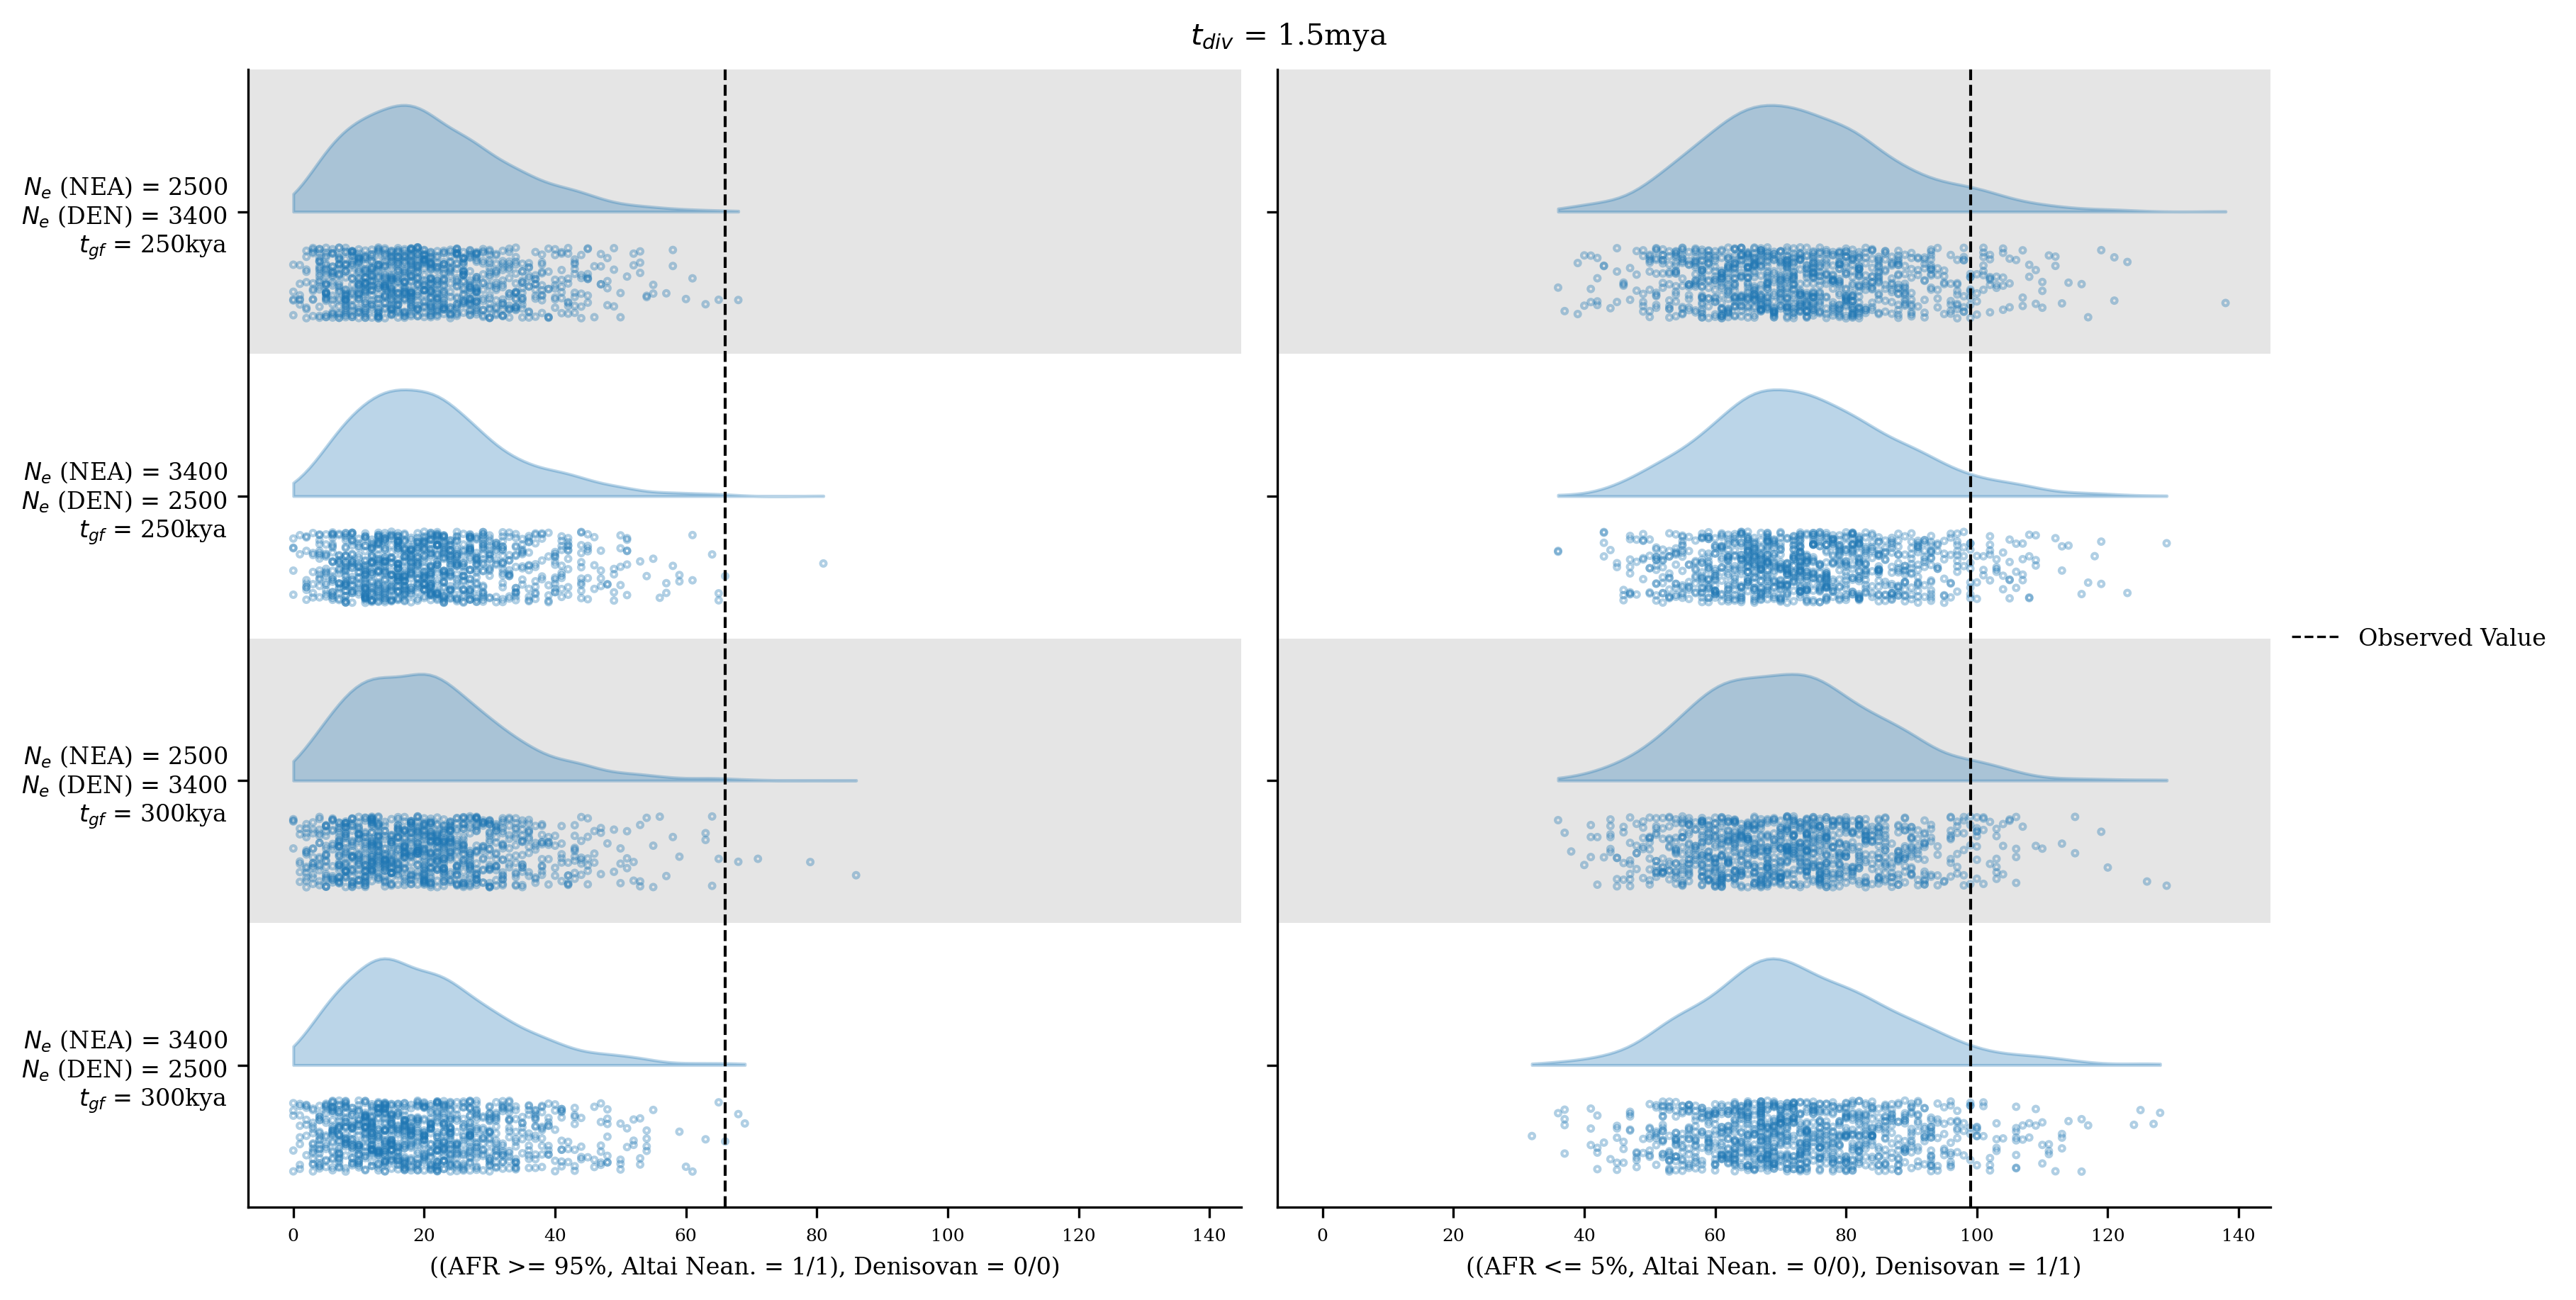

In [8]:
# Plot the results for the upper bound from Hubisz et al.
af.plot_sup2den_v_afr2nea_1d(hubisz_dicc, 1.5)

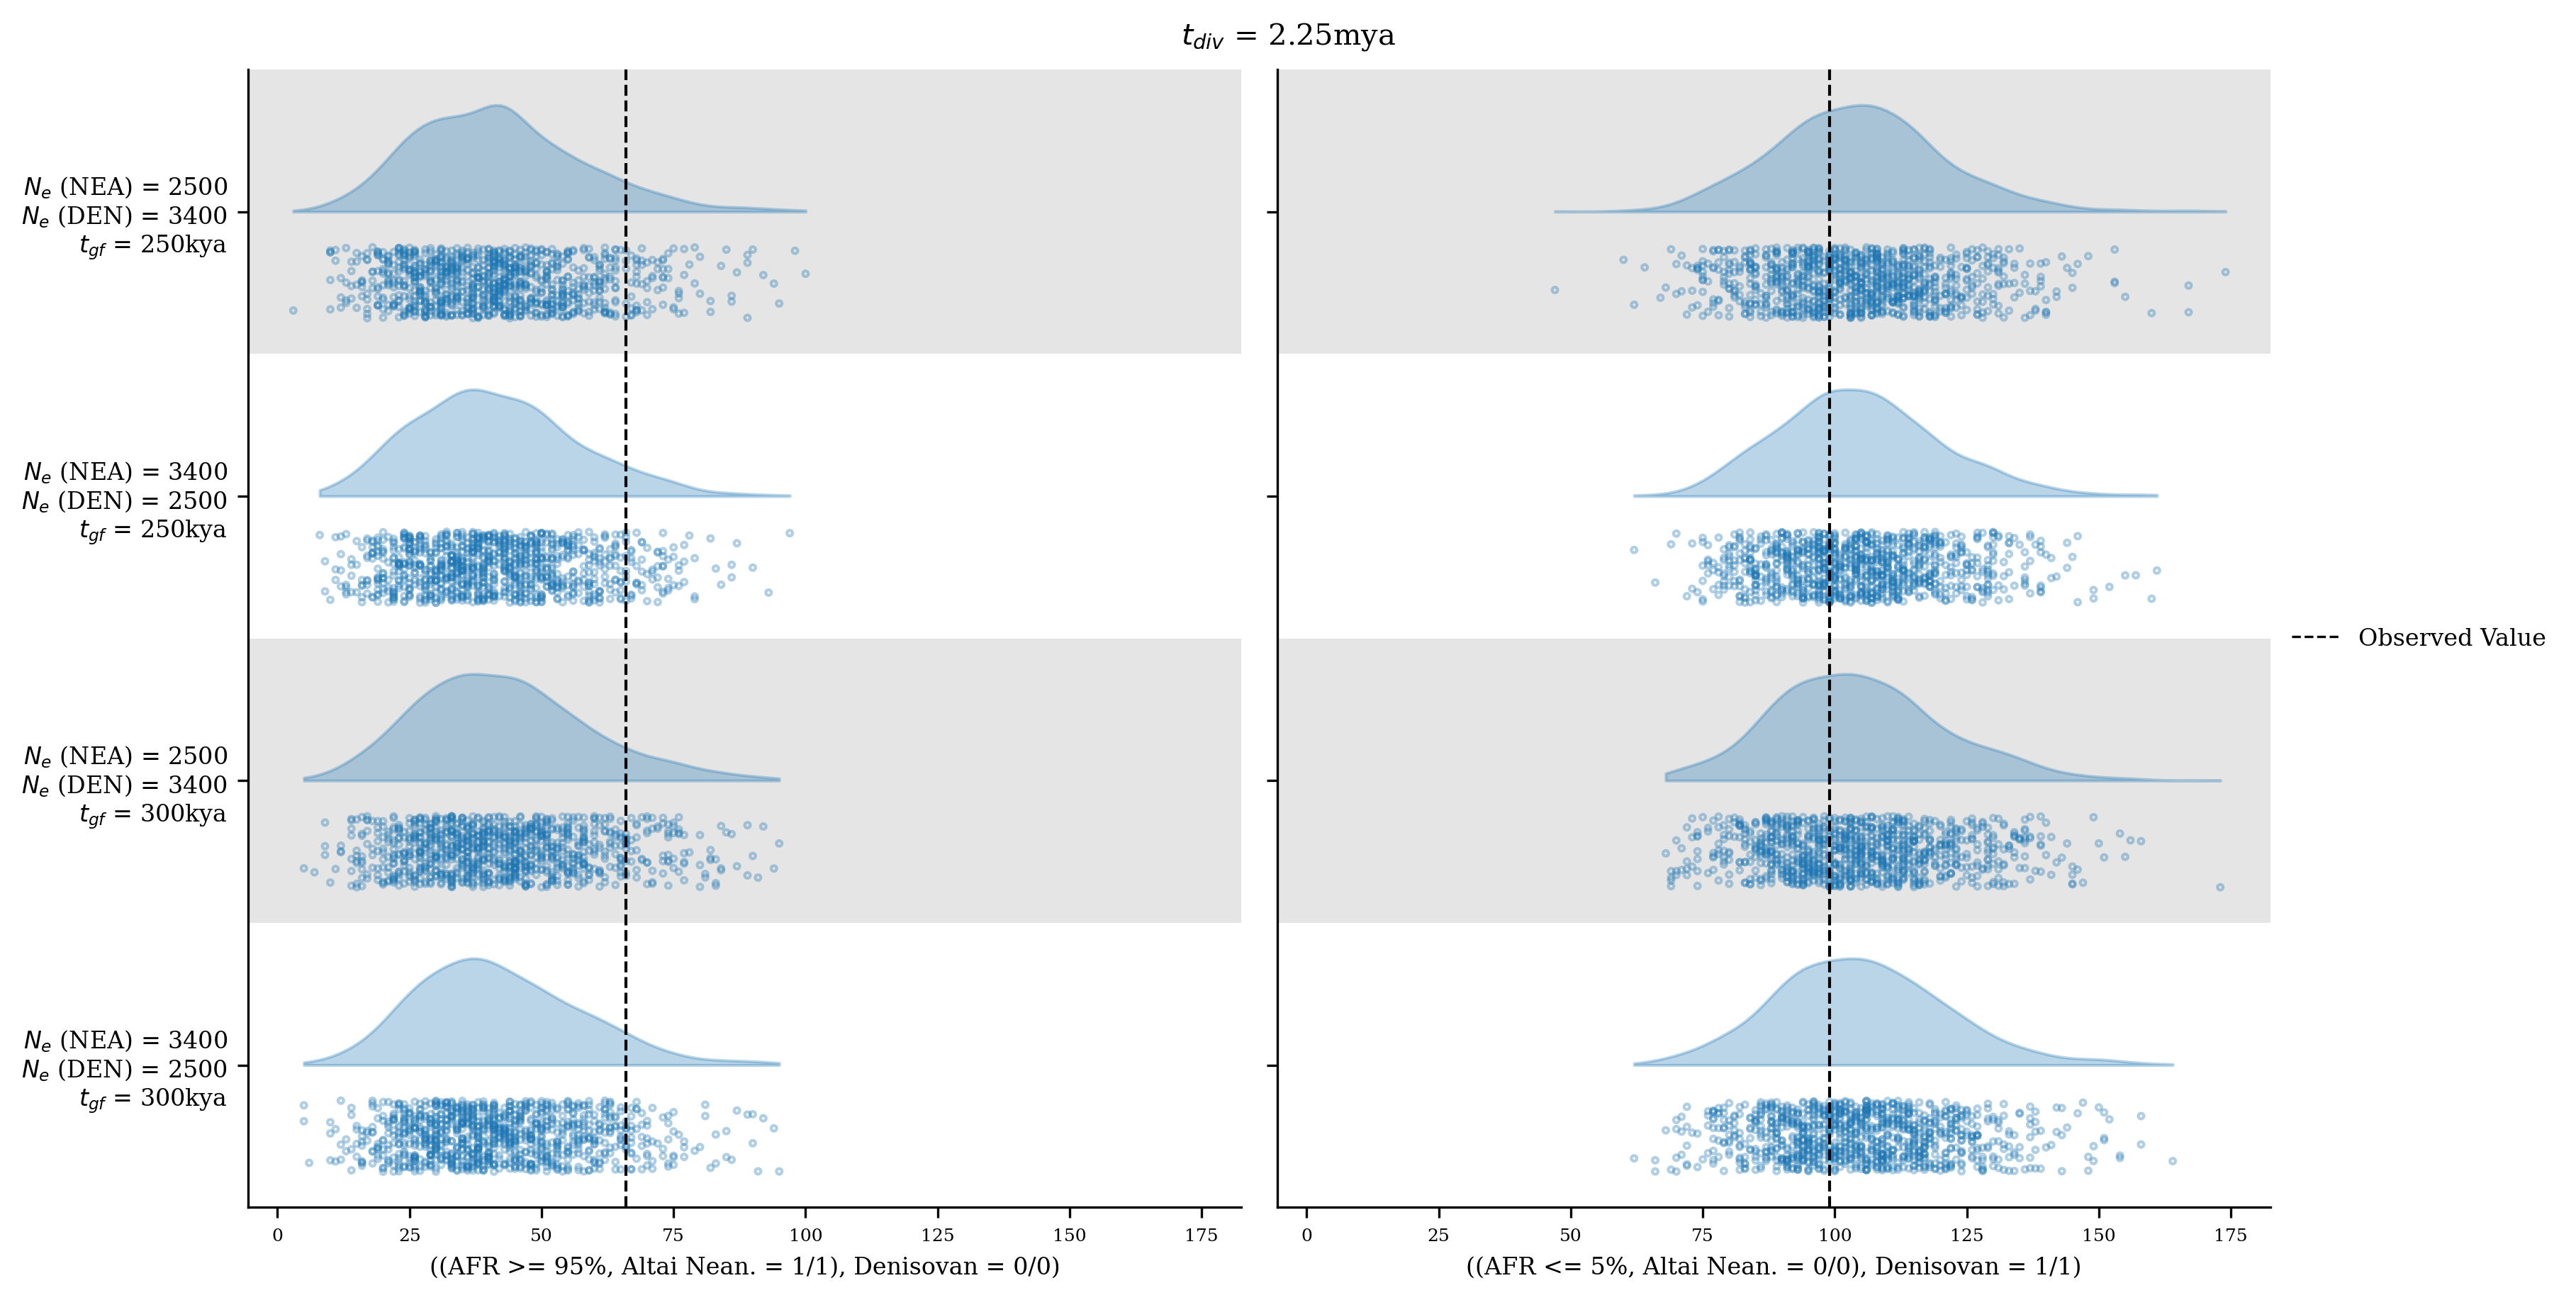

In [9]:
# Plot the plausible divergence time results.
af.plot_sup2den_v_afr2nea_1d(hubisz_dicc, 2.25)